<div style="position:relative; height:160px;">
<img src="logoDECATUFS.png" width="500" height="500" style="position:absolute; left:-8px;">
</div>

<div style="text-align:center;font-size:17px; white-space:pre;margin-top:-35px">
        <h3>             Modelos Lineares Generalizados</h3>
        Disciplina ofertada pelo DECAT/UFS
        Código: ESTAT0092
        Nível: Graduação
        Carga horária: 60h
        Período: 2020.2
        Professor responsável e ministrante: Luiz Henrique Dore
        <h3>            Aula 15: seleção das variáveis</h3>
</div>

# Exemplo 1

<p style="text-align: justify; font-size:16px">
Considere o conjunto de dados <b>store.dat</b>, cuja descrição foi feita no exemplo 2 da aula 2. O objetivo é ajustar um modelo de regressão Poisson, no qual a variável resposta é o número de clientes e as <b>possíveis</b> variáveis preditoras são o número de domicílios, a renda média anual, a idade média dos domicílios, a distância ao concorrente mais próximo e a distância à loja. A busca exaustiva e o algoritmo stepwise são aplicados para determinar quais dessas variáveis preditoras devem fazer parte do modelo.
<p>

### 1.1 Leitura e visualização dos dados

In [1]:
dados<-read.table("/Dados/Google_Drive_UFS/Aulas/2020_2/MLG/Dados/store.dat",header=TRUE)
n<-dim(dados)[1] #Número de observações
head(dados) #Visualizando as primeiras observações

,numClientes,numDom,rendaMedia,idadeDom,distConc,distLoja
,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,9,606,41393,3,3.04,6.32
2,6,641,23635,18,1.95,8.89
3,28,505,55475,27,6.54,2.05
4,11,866,64646,31,1.67,5.81
5,4,599,31972,7,0.72,8.11
6,4,520,41755,23,2.24,6.81


### 1.2 Seleção das variáveis pelo método da busca exaustiva, utilizando a função ``glmulti``

<p style="text-align: justify;font-size: 16px">Carregando os pacotes necessários.</p>

In [2]:
library("glmulti")

Loading required package: rJava

Loading required package: leaps



<p style="text-align: justify;font-size: 16px">A função <font face="'Courier New'">glmulti</font> seleciona o submodelo pelo método da busca exaustiva. Os principais argumentos da função são os seguintes:</p>
    <ol style="text-align: justify; font-size:16px">
        <li><font face="'Courier New'">y</font>: string contendo o nome da variável resposta;</li>
        <li><font face="'Courier New'">xr</font>: vetor de strings contendo os nomes das variáveis preditoras disponíveis;</li>
        <li><font face="'Courier New'">level</font>: indica se apenas os efeitos principais devem ser considerados (<font face="'Courier New'">level=1</font>) ou se devem ser consideradas também as interações (<font face="'Courier New'">level=2</font>);</li>
        <li><font face="'Courier New'">data</font>: data frame contendo as variáveis resposta e preditoras;</li>
        <li><font face="'Courier New'">method</font>: método de busca do submodelo ótimo; para realizar a busca exaustiva, deve-se informar <font face="'Courier New'">method="h"</font>;</li>
        <li><font face="'Courier New'">crit</font>: critério de informação a ser utilizado; para utilizar o critério de Akaike, deve-se informar <font face="'Courier New'">crit="aic"</font>;</li>
        <li><font face="'Courier New'">fitfunction</font>: função que realiza o ajuste de regressão; para ajustar um mlg, deve-se informar <font face="'Courier New'">fitfunction="glm"</font>;</li>
        <li><font face="'Courier New'">family</font>: especificação da distribuição de probabilidade da resposta e da função de ligação;</li>
        <li><font face="'Courier New'">confsetsize</font>: tamanho da lista com os melhores modelos.</li>
    </ol>
    <p style="text-align: justify;font-size: 16px">Para mais informações sobre a função <font face="'Courier New'">glmulti</font> e seus argumentos, acesse a ajuda da função executando o comando <font face="'Courier New'">?glmulti</font>.<p>
</p>

Initialization...
TASK: Exhaustive screening of candidate set.
Fitting...

After 50 models:
Best model: numClientes~1+numDom+rendaMedia+idadeDom+distConc+distLoja
Crit= 571.024271442436
Mean crit= 583.607658154653
Completed.


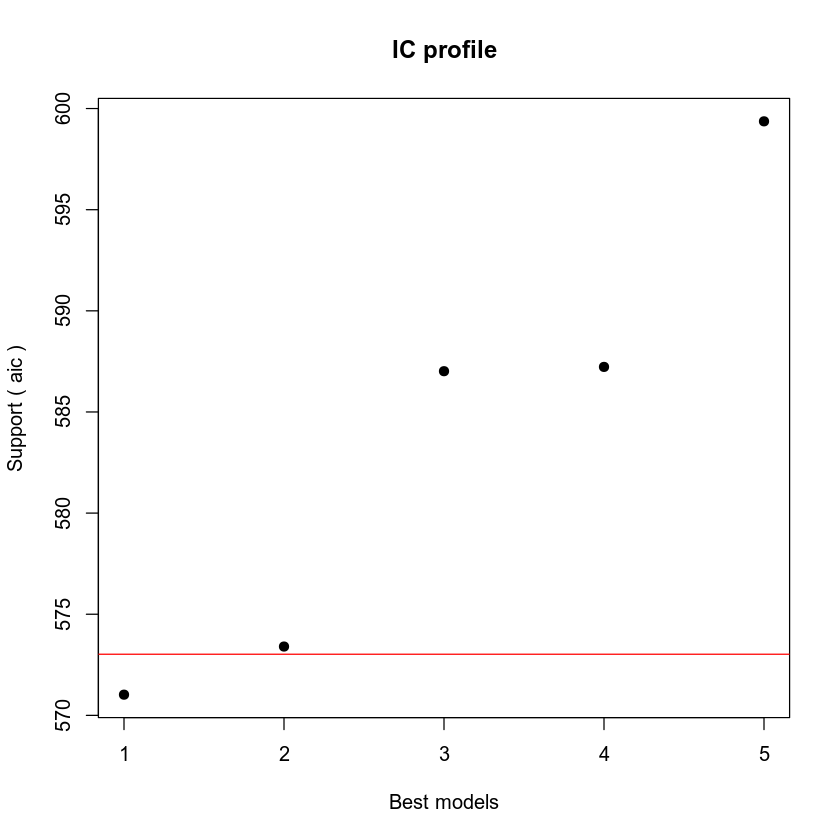

In [3]:
respName<-names(dados)[1] #Nomes das variável resposta
predNames<-names(dados)[-1] #Nomes das variáveis prediotras
ajExaust<-glmulti(y=respName,xr=predNames,level=1,data=dados,method="h",crit="aic",fitfunction="glm",family=poisson(link="log"),confsetsize=5)

<p style="text-align: justify;font-size: 16px">Visualizando a lista com os cinco melhores modelos. O primeiro modelo na lista é o que produz o menor valor de AIC.<p>

In [4]:
bestModels<-slot(ajExaust,"objects")
bestModels

[[1]]

Call:  fitfunc(formula = as.formula(x), family = ..1, data = data)

Coefficients:
(Intercept)       numDom   rendaMedia     idadeDom     distConc     distLoja  
  2.942e+00    6.058e-04   -1.169e-05   -3.726e-03    1.684e-01   -1.288e-01  

Degrees of Freedom: 109 Total (i.e. Null);  104 Residual
Null Deviance:	    422.2 
Residual Deviance: 115 	AIC: 571

[[2]]

Call:  fitfunc(formula = as.formula(x), family = ..1, data = data)

Coefficients:
(Intercept)       numDom   rendaMedia     distConc     distLoja  
  2.833e+00    5.504e-04   -1.106e-05    1.677e-01   -1.263e-01  

Degrees of Freedom: 109 Total (i.e. Null);  105 Residual
Null Deviance:	    422.2 
Residual Deviance: 119.4 	AIC: 573.4

[[3]]

Call:  fitfunc(formula = as.formula(x), family = ..1, data = data)

Coefficients:
(Intercept)   rendaMedia     distConc     distLoja  
  2.964e+00   -6.327e-06    1.693e-01   -1.270e-01  

Degrees of Freedom: 109 Total (i.e. Null);  106 Residual
Null Deviance:	    422.2 
Residual Devi

<p style="text-align: justify;font-size: 16px">O modelo com menor AIC é o modelo contendo todas as variáveis preditoras disponíveis.<p>

<p style="text-align: justify;font-size: 16px">Visualizando o ajuste do modelo com menor AIC.<p>

In [5]:
ajBest<-bestModels[[1]]
summary(ajBest)


Call:
fitfunc(formula = as.formula(x), family = ..1, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.93195  -0.58868  -0.00009   0.59269   2.23441  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.942e+00  2.072e-01  14.198  < 2e-16 ***
numDom       6.058e-04  1.421e-04   4.262 2.02e-05 ***
rendaMedia  -1.169e-05  2.112e-06  -5.534 3.13e-08 ***
idadeDom    -3.726e-03  1.782e-03  -2.091   0.0365 *  
distConc     1.684e-01  2.577e-02   6.534 6.39e-11 ***
distLoja    -1.288e-01  1.620e-02  -7.948 1.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 422.22  on 109  degrees of freedom
Residual deviance: 114.99  on 104  degrees of freedom
AIC: 571.02

Number of Fisher Scoring iterations: 4


<p style="text-align: justify;font-size: 16px">Como há 5 variáveis preditoras, o total de submodelos possíveis é $2^5=32$. Para produzir uma lista com todos esses submodelos, informe um número maior ou igual a 32 no argumento <font face="'Courier New'">confsetsize</font>.<p>

Initialization...
TASK: Exhaustive screening of candidate set.
Fitting...

After 50 models:
Best model: numClientes~1+numDom+rendaMedia+idadeDom+distConc+distLoja
Crit= 571.024271442436
Mean crit= 676.509444037793
Completed.


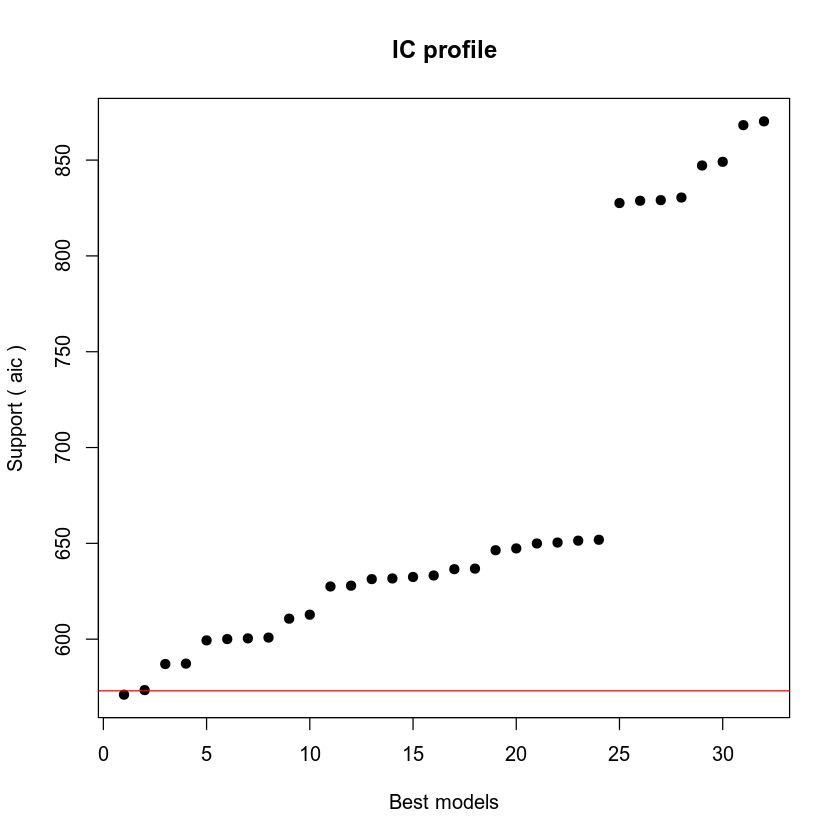

In [6]:
ajExaustTodos<-glmulti(y=respName,xr=predNames,level=1,data=dados,method="h",crit="aic",fitfunction="glm",family=poisson(link="log"),confsetsize=100)

<p style="text-align: justify;font-size: 16px">Visualizando a lista com todos os 32 submodelos. O primeiro modelo na lista é o que produz o menor valor de AIC.<p>

In [7]:
slot(ajExaustTodos,"objects")

[[1]]

Call:  fitfunc(formula = as.formula(x), family = ..1, data = data)

Coefficients:
(Intercept)       numDom   rendaMedia     idadeDom     distConc     distLoja  
  2.942e+00    6.058e-04   -1.169e-05   -3.726e-03    1.684e-01   -1.288e-01  

Degrees of Freedom: 109 Total (i.e. Null);  104 Residual
Null Deviance:	    422.2 
Residual Deviance: 115 	AIC: 571

[[2]]

Call:  fitfunc(formula = as.formula(x), family = ..1, data = data)

Coefficients:
(Intercept)       numDom   rendaMedia     distConc     distLoja  
  2.833e+00    5.504e-04   -1.106e-05    1.677e-01   -1.263e-01  

Degrees of Freedom: 109 Total (i.e. Null);  105 Residual
Null Deviance:	    422.2 
Residual Deviance: 119.4 	AIC: 573.4

[[3]]

Call:  fitfunc(formula = as.formula(x), family = ..1, data = data)

Coefficients:
(Intercept)   rendaMedia     distConc     distLoja  
  2.964e+00   -6.327e-06    1.693e-01   -1.270e-01  

Degrees of Freedom: 109 Total (i.e. Null);  106 Residual
Null Deviance:	    422.2 
Residual Devi

### 1.3 Seleção das variáveis pelo método stepwise utilizando a função ``step``

<p style="text-align: justify;font-size: 16px">A função <font face="'Courier New'">step</font> seleciona o submodelo pelo método stepwise. Os principais argumentos da função são os seguintes:</p>
    <ol style="text-align: justify; font-size:16px">
        <li><font face="'Courier New'">object</font>:  modelo ajustado. Saída da função <font face="'Courier New'">glm</font>;</li>
        <li><font face="'Courier New'">scope</font>: lista contendo os elementos <font face="'Courier New'">lower</font>, que é a fórmula do menor modelo a ser examinado, e <font face="'Courier New'">upper</font>, que é a fórmula do maior modelo a ser examinado;</li>
        <li><font face="'Courier New'">direction</font>: algoritmo a ser utilizado; para o forward, informa-se <font face="'Courier New'">direction="forward"</font>; para o backward, informa-se <font face="'Courier New'">direction="backward"</font>; para o stepwise, informa-se <font face="'Courier New'">direction="both"</font>;</li>
        <li><font face="'Courier New'">k</font>: constante que deve ser multiplicada pelo número $p$ de variáveis no cálculo do critério de informação; para obter o AIC, informa-se <font face="'Courier New'">k=2</font>; para obter o BIC, informa-se <font face="'Courier New'">k=$\ln(n)$</font>, onde $n$ é o número de observações.</li>
    </ol>
</p>

<p style="text-align: justify;font-size: 16px">Para que o algoritmo leve em conta todas as variáveis, ajuste o modelo sem variáveis preditoras informe esse ajuste como o argumento <font face="'Courier New'">object</font>. No argumento <font face="'Courier New'">scope</font>, o elemento <font face="'Courier New'">lower</font> deve ser a fórmula do modelo sem variáveis preditoras e o elemento <font face="'Courier New'">upper</font> a fórmula do modelo com todas as variáveis disponíveis.</p>

In [8]:
aj0<-glm(numClientes~1,family=poisson(link="log"),data=dados) #Ajustando o modelo sem variáveis preditoras
ajStep<-step(aj0,scope=list(lower=numClientes~1,upper=numClientes~numDom+rendaMedia+idadeDom+distConc+distLoja),direction="both",k=2) #Executando o stepwise

Start:  AIC=868.26
numClientes ~ 1

             Df Deviance    AIC
+ distLoja    1   184.41 632.45
+ distConc    1   201.90 649.93
+ numDom      1   379.56 827.60
+ rendaMedia  1   399.15 847.19
<none>            422.22 868.26
+ idadeDom    1   422.20 870.24

Step:  AIC=632.45
numClientes ~ distLoja

             Df Deviance    AIC
+ distConc    1   149.33 599.37
+ rendaMedia  1   177.45 627.49
+ numDom      1   181.29 631.33
<none>            184.41 632.45
+ idadeDom    1   183.19 633.23
- distLoja    1   422.22 868.26

Step:  AIC=599.37
numClientes ~ distLoja + distConc

             Df Deviance    AIC
+ rendaMedia  1   134.98 587.02
<none>            149.33 599.37
+ idadeDom    1   148.00 600.04
+ numDom      1   148.37 600.41
- distConc    1   184.41 632.45
- distLoja    1   201.90 649.93

Step:  AIC=587.02
numClientes ~ distLoja + distConc + rendaMedia

             Df Deviance    AIC
+ numDom      1   119.36 573.40
<none>            134.98 587.02
+ idadeDom    1   133.19 587.23


<p style="text-align: justify;font-size: 16px">O modelo com menor AIC, obtido pelo algoritmo stepwise, é o modelo com todas as variáveis preditoras.</p>

<p style="text-align: justify;font-size: 16px">Visualizando o ajuste do modelo com menor AIC.<p>

In [9]:
summary(ajStep)


Call:
glm(formula = numClientes ~ distLoja + distConc + rendaMedia + 
    numDom + idadeDom, family = poisson(link = "log"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.93195  -0.58868  -0.00009   0.59269   2.23441  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.942e+00  2.072e-01  14.198  < 2e-16 ***
distLoja    -1.288e-01  1.620e-02  -7.948 1.89e-15 ***
distConc     1.684e-01  2.577e-02   6.534 6.39e-11 ***
rendaMedia  -1.169e-05  2.112e-06  -5.534 3.13e-08 ***
numDom       6.058e-04  1.421e-04   4.262 2.02e-05 ***
idadeDom    -3.726e-03  1.782e-03  -2.091   0.0365 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 422.22  on 109  degrees of freedom
Residual deviance: 114.99  on 104  degrees of freedom
AIC: 571.02

Number of Fisher Scoring iterations: 4


<p style="text-align: justify;font-size: 16px">O modelo obtido pelo algoritmo stepwise é igual aquele obtido pela busca exaustiva.</p>